In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.2)


<font size=5 color=green><b>Loading and reading the dataset, performing the necessary analysis(includes dropping un-necessary columns, removing nulls and cleaning the data)</b></font>

In [2]:
df = pd.read_csv('College_Data.csv')
df

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [3]:
df.drop('University', axis=1, inplace=True)
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [4]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [5]:
df.isna().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

<font size=5 color=green><b>After making sure the data is clean and ready, divide the categorical columns and transform them to be ready for pre-processing</b></font>

In [7]:
df = pd.get_dummies(df, columns=['Private'], drop_first=True)
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


<font size=5 color=green><b>Using standard scaler to transform the data for the Model.</b></font>

In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -5.01910084e-01, -3.18251941e-01,  6.12553050e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
         1.66109850e-01, -5.51261842e-01,  6.12553050e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
        -1.77289956e-01, -6.67766793e-01,  6.12553050e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.56241250e-01, -9.59029170e-01,  6.12553050e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         5.88797079e+00,  1.95359460e+00,  6.12553050e-01],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
        -9.87115613e-01,  1.95359460e+00,  6.12553050e-01]])

<font size=5 color=green><b>Here, I'm using the elbow method to determine the best number of clusters the data should be divided into, having good intertia value</b></font>

In [9]:
num_of_clusters = range(2,51)
inertia_of_clusters = []
for k in num_of_clusters:
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    inertia_of_clusters.append(model.inertia_)
    

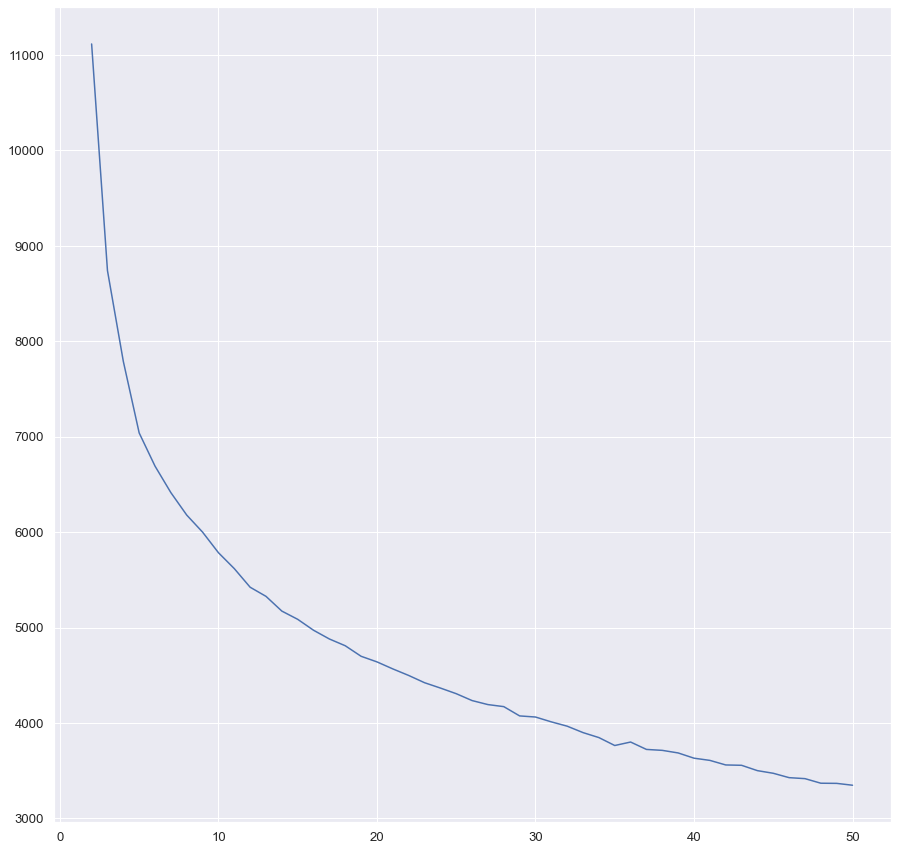

In [10]:
plt.plot(num_of_clusters, inertia_of_clusters)

<font size=5 color=green><b>As shown in the graph, dividing the data to clusters of 20 or more would be ideal and have low intertia marking the breaking point at which inertia value starts to decrease the larger the number of clusters, but for analysis purposes I picked only 10 clusters to be able to analyze the data thoroughly, and because 10 clusters have an average inertia value. </b></font>

In [11]:
model = KMeans(n_clusters=10)
clusters = model.fit_predict(df_scaled)
df['Clusters'] = clusters
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes,Clusters
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,6
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,2
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0,8
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1,6
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1,6
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1,9


In [12]:
model.inertia_

5765.734459383441

<font size=5 color=green><b>Having "enroll" on the Y-axis, drawing plots and each plot's X-axis has a different feature to see them all through.</b></font>

          count          mean          std      min       25%      50%  \
Clusters                                                                 
0          17.0  18516.588235  8057.397394  12445.0  14752.00  15712.0   
1         147.0    882.687075   924.181554    100.0    412.00    589.0   
2          61.0   3132.344262  1835.141701    318.0   1861.00   2895.0   
3          59.0   8732.033898  2941.579349   3580.0   6408.50   8427.0   
4          17.0   6014.705882  3426.243328   1618.0   3793.00   4963.0   
5          37.0   2252.189189  1650.306804    331.0   1109.00   1800.0   
6         157.0   1163.802548   893.136812    167.0    605.00    895.0   
7         149.0   1875.234899  1354.576285     81.0    949.00   1557.0   
8         113.0   2978.123894  1890.819116    233.0   1455.00   2747.0   
9          20.0   9861.850000  2783.728100   5661.0   7756.75   8747.0   

              75%      max  
Clusters                    
0         19315.0  48094.0  
1          1043.5   7178

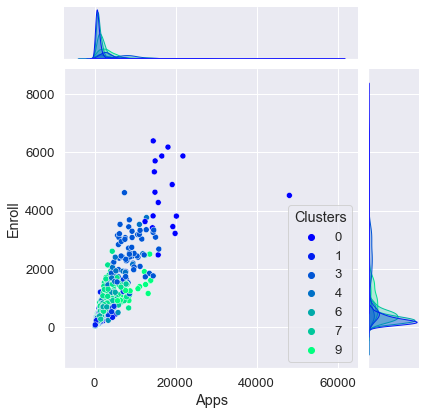

          count          mean          std     min       25%      50%  \
Clusters                                                                
0          17.0  12628.823529  4314.781588  8252.0  10344.00  11652.0   
1         147.0    682.353741   636.857544    90.0    342.50    497.0   
2          61.0   1835.901639  1185.460933   240.0    998.00   1546.0   
3          59.0   6000.084746  1682.423675  2603.0   4712.50   5839.0   
4          17.0   4111.529412  2551.967993  1141.0   2559.00   3100.0   
5          37.0   1538.135135  1134.916056   264.0    695.00   1253.0   
6         157.0    889.312102   646.734022   130.0    479.00    709.0   
7         149.0   1425.979866   977.804998    72.0    782.00   1188.0   
8         113.0   2074.115044  1150.855324   158.0   1064.00   2044.0   
9          20.0   3717.250000  1516.865843  1930.0   2362.25   3342.5   

               75%      max  
Clusters                     
0         13007.00  26330.0  
1           781.00   4471.0  
2  

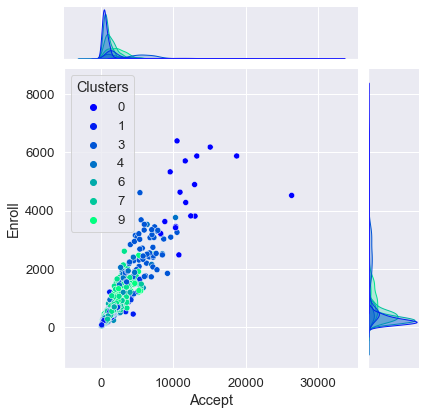

          count         mean          std     min      25%     50%     75%  \
Clusters                                                                     
0          17.0  4557.352941  1178.604309  2478.0  3623.00  4520.0  5705.0   
1         147.0   267.863946   196.902821    35.0   151.00   212.0   335.5   
2          61.0   558.360656   349.909180   130.0   359.00   478.0   659.0   
3          59.0  2517.983051   681.265139  1143.0  1970.50  2440.0  3077.5   
4          17.0  1904.470588   838.716886   479.0  1448.00  1876.0  2151.0   
5          37.0   547.189189   311.456064    97.0   315.00   483.0   730.0   
6         157.0   335.662420   207.875874    46.0   197.00   282.0   385.0   
7         149.0   456.067114   273.220945    51.0   278.00   425.0   563.0   
8         113.0   935.530973   507.539796   132.0   510.00   891.0  1301.0   
9          20.0  1378.850000   462.623898   871.0  1084.75  1248.5  1520.0   

             max  
Clusters          
0         6392.0  
1     

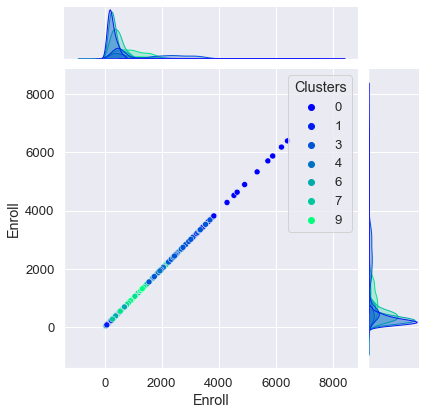

          count       mean        std   min    25%   50%    75%   max
Clusters                                                             
0          17.0  44.352941  22.183725  12.0  29.00  45.0  52.00  95.0
1         147.0  17.285714   8.035026   2.0  12.00  16.0  22.50  51.0
2          61.0  54.672131  15.472256  21.0  46.00  52.0  62.00  95.0
3          59.0  30.610169  16.114907   5.0  21.50  27.0  36.00  89.0
4          17.0  21.470588   7.559081   9.0  17.00  20.0  25.00  42.0
5          37.0  30.216216  14.292840   1.0  20.00  30.0  42.00  56.0
6         157.0  20.343949   8.715381   3.0  14.00  20.0  25.00  57.0
7         149.0  33.959732   9.734224  16.0  27.00  33.0  40.00  67.0
8         113.0  14.805310   7.970771   1.0  10.00  14.0  19.00  45.0
9          20.0  78.350000  11.811123  56.0  70.75  77.0  87.75  96.0


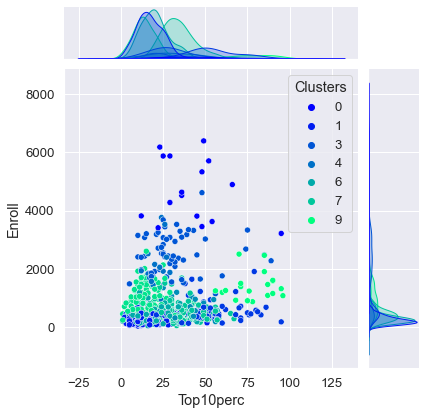

          count       mean        std   min    25%   50%    75%    max
Clusters                                                              
0          17.0  76.529412  17.993463  39.0  60.00  80.0  88.00  100.0
1         147.0  42.006803  14.388683   9.0  31.50  41.0  50.50   92.0
2          61.0  83.672131  11.341254  44.0  79.00  85.0  93.00  100.0
3          59.0  62.711864  16.756935  29.0  53.00  62.0  70.50  100.0
4          17.0  49.941176  15.319394  24.0  42.00  49.0  55.00   89.0
5          37.0  61.864865  17.331991  20.0  54.00  63.0  74.00   94.0
6         157.0  46.789809  12.724916  20.0  36.00  46.0  55.00   88.0
7         149.0  65.744966  10.519708  38.0  59.00  66.0  72.00   99.0
8         113.0  43.460177  15.389024  12.0  33.00  43.0  53.00   85.0
9          20.0  94.150000   6.072154  75.0  92.75  95.5  98.25  100.0


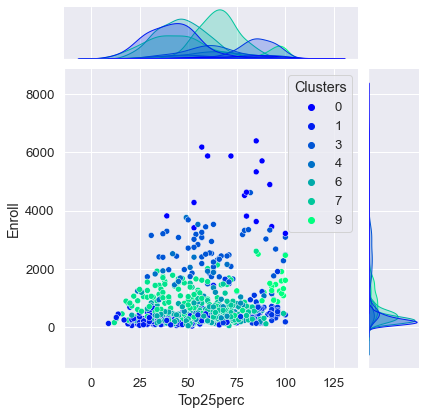

          count          mean          std      min       25%      50%  \
Clusters                                                                 
0          17.0  22753.529412  5355.903765  12677.0  19340.00  23945.0   
1         147.0   1101.278912   993.189368    201.0    637.00    908.0   
2          61.0   2136.163934  1509.171971    416.0   1220.00   1737.0   
3          59.0  13021.389831  3808.671010   5060.0  10138.50  13138.0   
4          17.0  11965.470588  4203.557766   4793.0   9844.00  11160.0   
5          37.0   2723.432432  1591.257915    500.0   1685.00   2478.0   
6         157.0   1376.738854   820.587728    199.0    775.00   1151.0   
7         149.0   1800.731544  1165.420337    139.0   1041.00   1476.0   
8         113.0   4673.380531  2514.224179    658.0   2754.00   4296.0   
9          20.0   5541.650000  2191.733783   3340.0   4178.25   5144.0   

               75%      max  
Clusters                     
0         26213.00  31643.0  
1          1275.50   

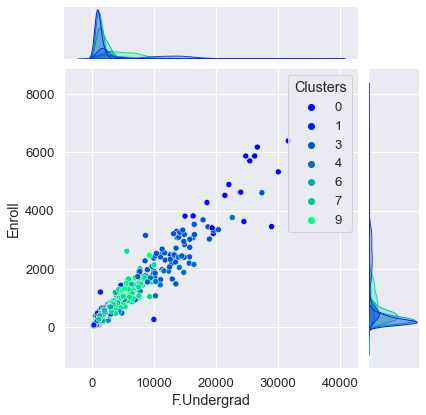

          count         mean          std     min     25%     50%     75%  \
Clusters                                                                    
0          17.0  2643.235294  1316.794191   604.0  1940.0  2717.0  3712.0   
1         147.0   380.945578   424.299467     2.0    82.0   228.0   532.0   
2          61.0   134.672131   294.281312     1.0    19.0    41.0    95.0   
3          59.0  2076.237288  1265.935232   114.0  1253.5  1687.0  3020.0   
4          17.0  8060.117647  4067.943382  4552.0  5457.0  7443.0  9054.0   
5          37.0   862.675676   862.949466    44.0   209.0   556.0  1309.0   
6         157.0   482.764331   518.178926     7.0   117.0   336.0   658.0   
7         149.0   297.248322   372.974220     1.0    44.0   159.0   399.0   
8         113.0  1194.407080   987.701649    33.0   472.0   939.0  1532.0   
9          20.0   446.350000   691.311894    28.0    54.5   182.0   414.0   

              max  
Clusters           
0          5189.0  
1          2281

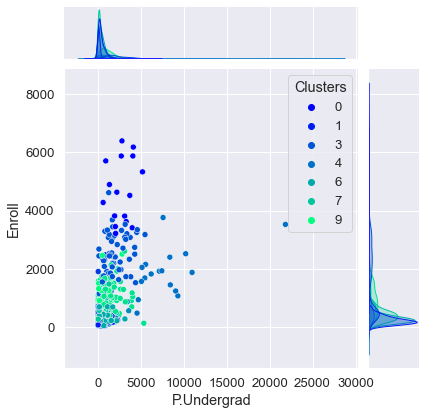

          count          mean          std      min      25%      50%  \
Clusters                                                                
0          17.0   9847.882353  3394.920008   5130.0   7560.0   9556.0   
1         147.0   8707.095238  2263.448528   4286.0   7332.0   8770.0   
2          61.0  17502.442623  2068.229078  11720.0  16560.0  18200.0   
3          59.0   8029.338983  2636.043114   2340.0   6550.0   7452.0   
4          17.0   7151.882353  2377.641791   4104.0   6540.0   6760.0   
5          37.0   9783.324324  2337.150604   5391.0   8127.0   9843.0   
6         157.0  10187.401274  2191.101274   4400.0   8840.0  10430.0   
7         149.0  13477.946309  2132.218081   8578.0  11985.0  13380.0   
8         113.0   5904.805310  1507.714210   2580.0   4680.0   5962.0   
9          20.0  18260.950000  1422.804069  13850.0  17817.0  18417.5   

              75%      max  
Clusters                    
0         10658.0  18420.0  
1          9900.0  21700.0  
2      

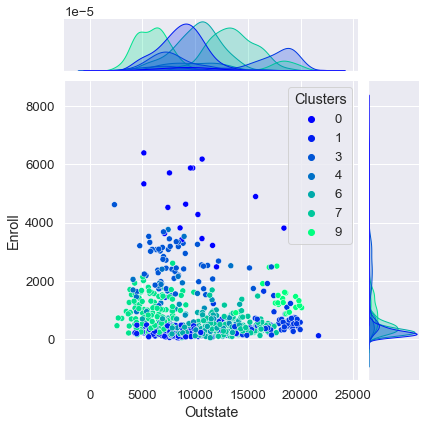

          count         mean          std     min     25%     50%     75%  \
Clusters                                                                    
0          17.0  4442.529412   988.910835  3176.0  3897.0  4180.0  4748.0   
1         147.0  3781.734694   757.920048  2370.0  3286.0  3680.0  4144.0   
2          61.0  5498.131148   932.599637  3336.0  4772.0  5600.0  6000.0   
3          59.0  4065.525424   901.795457  2540.0  3393.5  3960.0  4552.0   
4          17.0  4110.764706  1223.012854  2494.0  3579.0  3964.0  4850.0   
5          37.0  4687.216216   876.277897  2970.0  4140.0  4730.0  5376.0   
6         157.0  4408.324841   942.495122  2700.0  3700.0  4300.0  5084.0   
7         149.0  4878.738255   931.410144  3195.0  4195.0  4675.0  5580.0   
8         113.0  3469.991150   783.414658  1780.0  2780.0  3460.0  4040.0   
9          20.0  6232.500000   675.408298  4360.0  5922.0  6225.0  6602.5   

             max  
Clusters          
0         6810.0  
1         6450.0  

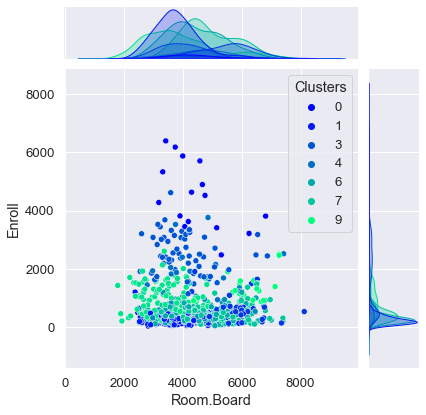

          count        mean         std    min    25%    50%     75%     max
Clusters                                                                    
0          17.0  585.764706   93.754020  475.0  504.0  570.0  636.00   790.0
1         147.0  528.877551  132.902421  300.0  450.0  500.0  600.00  1300.0
2          61.0  597.262295  209.142368  300.0  500.0  550.0  630.00  1495.0
3          59.0  599.711864  118.155953   96.0  527.5  600.0  655.00   860.0
4          17.0  615.058824  128.197343  450.0  500.0  600.0  714.00   858.0
5          37.0  840.216216  374.002090  450.0  650.0  700.0  900.00  2340.0
6         157.0  512.808917  110.813260  250.0  450.0  500.0  600.00  1000.0
7         149.0  512.899329  102.046409  275.0  450.0  500.0  600.00   955.0
8         113.0  505.053097  126.774043  110.0  450.0  500.0  600.00   800.0
9          20.0  590.100000  103.750663  450.0  500.0  575.0  671.25   768.0


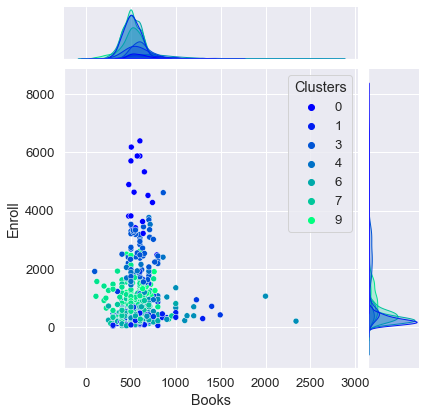

          count         mean          std     min     25%     50%     75%  \
Clusters                                                                    
0          17.0  1760.588235   587.570959   600.0  1530.0  1818.0  2009.0   
1         147.0  1364.238095   607.430579   400.0   950.0  1300.0  1700.0   
2          61.0   915.475410   305.346994   400.0   730.0   850.0  1100.0   
3          59.0  1801.779661   673.090122   650.0  1235.0  1755.0  2271.0   
4          17.0  2517.588235   815.131052  1200.0  1980.0  2400.0  3028.0   
5          37.0  2281.000000  1202.039933   620.0  1500.0  2102.0  2600.0   
6         157.0  1113.643312   447.500752   250.0   800.0  1000.0  1400.0   
7         149.0  1041.456376   432.326211   300.0   750.0   950.0  1278.0   
8         113.0  1470.185841   545.435467   400.0  1022.0  1498.0  1884.0   
9          20.0  1285.550000   416.771233   300.0  1030.0  1250.0  1577.5   

             max  
Clusters          
0         3140.0  
1         3700.0  

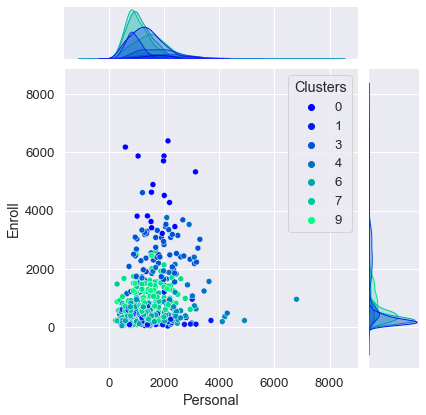

          count       mean        std   min   25%   50%   75%    max
Clusters                                                            
0          17.0  87.764706   5.460419  77.0  86.0  89.0  91.0   96.0
1         147.0  50.102041  11.608178  10.0  44.0  52.0  58.0   76.0
2          61.0  90.213115   6.194392  69.0  88.0  92.0  94.0  100.0
3          59.0  83.389831   6.370776  70.0  79.0  84.0  88.5   96.0
4          17.0  83.588235   7.027258  71.0  80.0  84.0  88.0   96.0
5          37.0  75.243243  19.292205   8.0  72.0  81.0  86.0   94.0
6         157.0  69.324841   8.670771  45.0  64.0  69.0  75.0   91.0
7         149.0  81.516779   8.816143  53.0  77.0  82.0  88.0  100.0
8         113.0  71.274336  11.477655  47.0  65.0  73.0  78.0  103.0
9          20.0  94.400000   3.676383  86.0  92.5  95.0  97.0   99.0


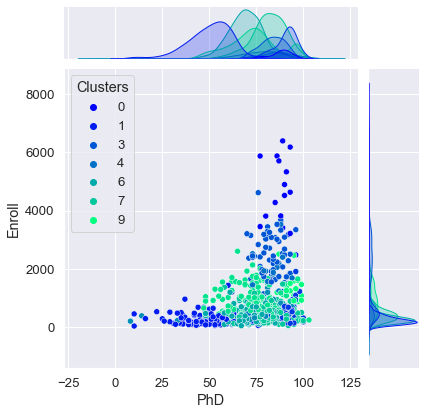

          count       mean        std   min   25%   50%   75%    max
Clusters                                                            
0          17.0  92.823529   4.850713  81.0  90.0  95.0  96.0   99.0
1         147.0  58.306122  10.562672  24.0  53.0  59.0  65.0   85.0
2          61.0  95.213115   3.521906  82.0  93.0  96.0  98.0  100.0
3          59.0  88.559322   5.995030  75.0  85.0  89.0  93.0  100.0
4          17.0  89.705882   7.679231  73.0  87.0  92.0  94.0  100.0
5          37.0  83.567568  12.846401  33.0  80.0  85.0  93.0  100.0
6         157.0  78.044586   8.048207  61.0  73.0  77.0  82.0  100.0
7         149.0  88.147651   7.190812  61.0  85.0  89.0  93.0  100.0
8         113.0  77.849558  11.400361  48.0  71.0  78.0  87.0  100.0
9          20.0  97.300000   2.079980  92.0  96.0  98.0  99.0  100.0


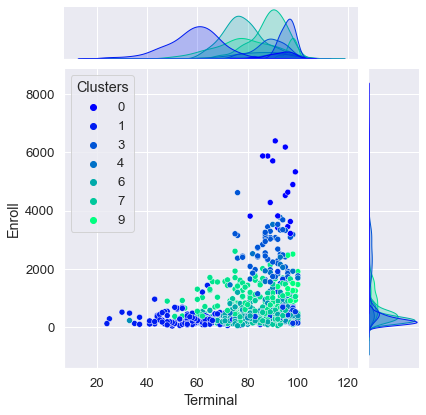

          count       mean       std   min    25%   50%    75%   max
Clusters                                                            
0          17.0  16.476471  3.442842  11.5  13.80  16.7  18.20  23.1
1         147.0  13.597279  3.325986   2.5  11.50  13.0  15.20  27.6
2          61.0  10.514754  2.370502   2.9   9.60  10.5  11.50  19.0
3          59.0  16.379661  3.972352   7.8  13.65  16.9  19.20  24.7
4          17.0  16.064706  5.204198   6.7  12.80  15.9  19.50  25.3
5          37.0  13.794595  3.659762   4.6  11.50  14.3  16.10  24.1
6         157.0  14.127389  3.180361   8.3  12.00  13.7  15.60  27.8
7         149.0  12.649664  2.095285   6.5  11.30  12.7  13.90  18.4
8         113.0  18.110619  3.380996  12.6  15.90  17.9  19.60  39.8
9          20.0   6.410000  1.939859   3.3   5.00   5.9   7.65  10.1


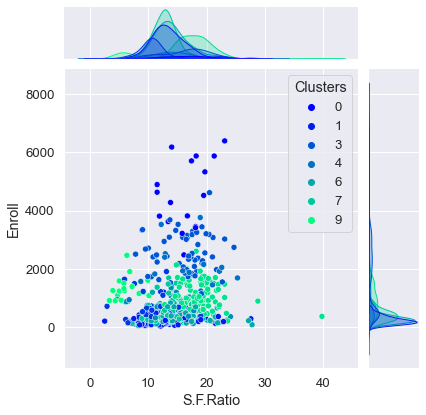

          count       mean        std   min    25%   50%    75%   max
Clusters                                                             
0          17.0  17.000000   5.830952   9.0  12.00  16.0  20.00  29.0
1         147.0  17.891156   9.857289   2.0  10.00  16.0  25.00  46.0
2          61.0  40.836066  12.295230  13.0  33.00  41.0  49.00  64.0
3          59.0  16.237288   8.771700   6.0  10.00  15.0  20.50  48.0
4          17.0  12.235294   8.664074   3.0   7.00   9.0  16.00  37.0
5          37.0  16.621622   7.173839   4.0  10.00  18.0  23.00  30.0
6         157.0  23.898089   9.686883   2.0  17.00  24.0  31.00  53.0
7         149.0  30.530201   9.422914  10.0  24.00  31.0  37.00  58.0
8         113.0  13.106195   6.946688   0.0   8.00  12.0  17.00  31.0
9          20.0  34.950000  10.733494  16.0  26.75  35.5  40.25  54.0


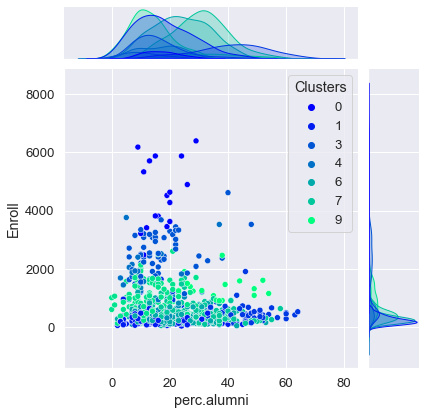

          count          mean          std      min       25%      50%  \
Clusters                                                                 
0          17.0  11039.000000  2982.488118   7837.0   8686.00  10276.0   
1         147.0   7368.768707  2056.941186   3186.0   6251.00   7140.0   
2          61.0  16696.901639  4430.901679   9534.0  14213.00  15886.0   
3          59.0   9070.661017  3031.627704   4632.0   6782.00   8055.0   
4          17.0   8628.764706  3573.895643   4329.0   6433.00   7930.0   
5          37.0   9115.324324  2714.103290   3480.0   7651.00   8954.0   
6         157.0   8117.484076  1587.438844   3733.0   7237.00   8028.0   
7         149.0  10830.167785  2302.209202   7100.0   9264.00  10458.0   
8         113.0   6067.592920  1321.798873   3605.0   5084.00   6112.0   
9          20.0  31183.350000  9375.382924  19635.0  25420.25  28388.5   

               75%      max  
Clusters                     
0         13919.00  16836.0  
1          8119.00  1

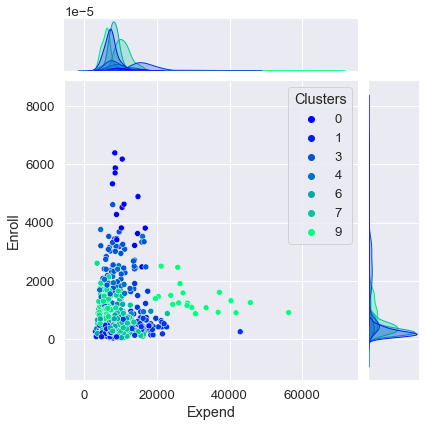

          count       mean        std   min    25%   50%    75%    max
Clusters                                                              
0          17.0  70.941176   6.609374  63.0  66.00  69.0  73.00   87.0
1         147.0  56.258503  17.116878  15.0  48.00  56.0  65.00  118.0
2          61.0  82.967213  11.263462  48.0  77.00  84.0  91.00  100.0
3          59.0  62.118644  13.274405  33.0  54.50  62.0  70.00   98.0
4          17.0  42.294118   9.053761  29.0  35.00  45.0  47.00   66.0
5          37.0  64.729730  14.270499  43.0  55.00  64.0  72.00  100.0
6         157.0  67.191083  12.898586  31.0  58.00  67.0  75.00  100.0
7         149.0  76.073826  11.309583  42.0  68.00  76.0  83.00  100.0
8         113.0  51.672566  13.116540  10.0  44.00  51.0  59.00  100.0
9          20.0  91.300000   8.360937  71.0  89.75  93.5  97.25  100.0


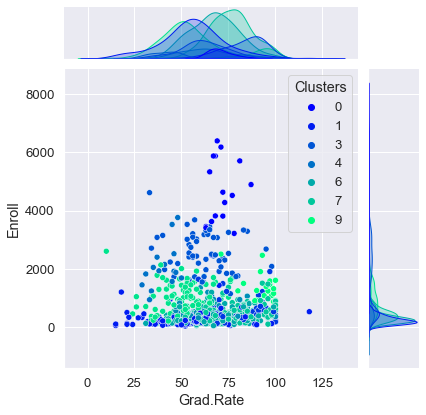

          count      mean       std  min  25%  50%  75%  max
Clusters                                                    
0          17.0  0.058824  0.242536  0.0  0.0  0.0  0.0  1.0
1         147.0  0.972789  0.163254  0.0  1.0  1.0  1.0  1.0
2          61.0  0.983607  0.128037  0.0  1.0  1.0  1.0  1.0
3          59.0  0.101695  0.304841  0.0  0.0  0.0  0.0  1.0
4          17.0  0.058824  0.242536  0.0  0.0  0.0  0.0  1.0
5          37.0  0.702703  0.463373  0.0  0.0  1.0  1.0  1.0
6         157.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
7         149.0  0.993289  0.081923  0.0  1.0  1.0  1.0  1.0
8         113.0  0.026549  0.161476  0.0  0.0  0.0  0.0  1.0
9          20.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


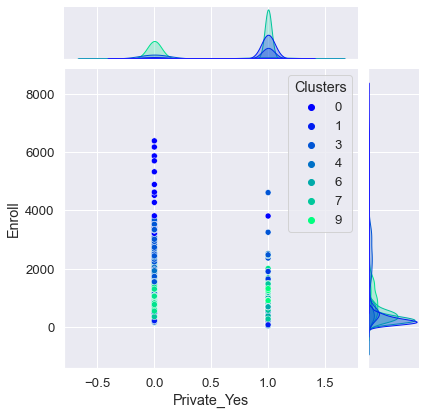

In [46]:
for cat in df.keys().to_list()[:-1]:
    print(df[df['Clusters'].between(0,10)].groupby('Clusters')[cat].describe())
    sns.jointplot(x=cat, y='Enroll', hue='Clusters', data=df[df['Clusters'].between(0,10)], palette='winter')
    plt.show()


<font size=5 color=green><b>After looking at the clusters and by using the graphs, the 3 most distinctive clusters are '0','1' and '9'</b></font>

<font size=5 color=green><b>1. The mentioned clusters have 3 distinct features, they contain different range counts where each cluster contains a specific range and represents a distinct group</b></font>

<font size=5 color=green><b>2. Cluster 0 has minimum value of 12,445 while its maximum is 48094, cluster 1 have minimum of 100 and maximum of 7178  where cluster 9 comes with a minimum of 5661 and maximum of 13865</b></font>

<font size=5 color=green><b>3. Both cluster 0 and 9 are similar in count, but each cluster (0,1,9) contains different mean and standard deviation as well(not just represented in range), having cluster 0 the highest mean with highest standard deviation, cluster 9 with second highest mean and standard deviation while cluster 1 has lowest mean and std</b></font>

<font size=5 color=green><b>4. Cluster 1 having highest count number with lowest standard deviation means this is the best cluster amongst the 3 clusters represented here.</b></font>


          count          mean          std      min       25%      50%  \
Clusters                                                                 
0          17.0  18516.588235  8057.397394  12445.0  14752.00  15712.0   
1         147.0    882.687075   924.181554    100.0    412.00    589.0   
9          20.0   9861.850000  2783.728100   5661.0   7756.75   8747.0   

              75%      max  
Clusters                    
0         19315.0  48094.0  
1          1043.5   7178.0  
9         12442.0  13865.0  


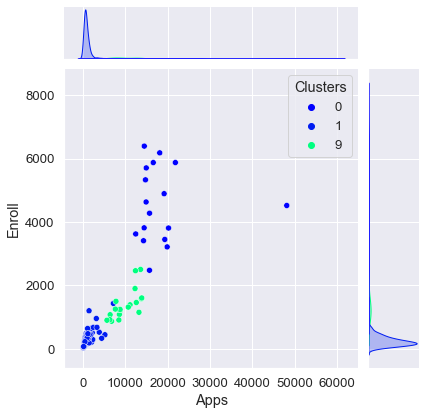

In [53]:

print(df[df['Clusters'].isin([0,1,9])].groupby('Clusters')['Apps'].describe())
sns.jointplot(x='Apps', y='Enroll', hue='Clusters', data=df[df['Clusters'].isin([0,1,9])], palette='winter')
plt.show()